<a href="https://colab.research.google.com/github/shwetamakwana/cs-assignments/blob/master/JIETML_cs_Assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Code to read csv file into colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
downloaded = drive.CreateFile({'id':'17yZ1NSSsRrDF7qfGOJyGHRDDiBce7EQN'}) # replace the id with id of file you want to access
downloaded.GetContentFile('Adult.csv') 

**step 1 data description and objective**

**The Adult Income dataset**
Description

Title of dataset: adult.csv


Number of Instances

* 48842 instances, mix of continuous and discrete (train=32561, test=16281)
* 45222 if instances with unknown values are removed (train=30162, test=15060)
* Split into train-test using MLC++ GenCVFiles (2/3, 1/3 random).

Number of Attributes/Fearures/Columns

* 6 continuous, 8 nominal attributes. 

Attribute Information/Fearures/Columns

* age: continuous.
* workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
* fnlwgt: continuous.
* education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
* education-num: continuous.
* marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
* occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
* relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
* race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
* sex: Female, Male.
* capital-gain: continuous.
* capital-loss: continuous.
* hours-per-week: continuous.
* native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
* income: >50K, <=50K 

Missing Values:

 7% rows have missing values. 

 **objective**
*  To analyse the data.
*  plot the Analysis of data 



**step 2**  **Import the data and display the head, shape and description of the data**


In [0]:
import numpy as np


In [0]:
import pandas as pd
df=pd.read_csv('Adult.csv')
df

age     workclass  fnlwgt  ... hours-per-week  native-country income
0       25       Private  226802  ...             40   United-States  <=50K
1       38       Private   89814  ...             50   United-States  <=50K
2       28     Local-gov  336951  ...             40   United-States   >50K
3       44       Private  160323  ...             40   United-States   >50K
4       18             ?  103497  ...             30   United-States  <=50K
...    ...           ...     ...  ...            ...             ...    ...
48837   27       Private  257302  ...             38   United-States  <=50K
48838   40       Private  154374  ...             40   United-States   >50K
48839   58       Private  151910  ...             40   United-States  <=50K
48840   22       Private  201490  ...             20   United-States  <=50K
48841   52  Self-emp-inc  287927  ...             40   United-States   >50K

[48842 rows x 15 columns]

In [0]:
df.head()

age  workclass  fnlwgt  ... hours-per-week  native-country income
0   25    Private  226802  ...             40   United-States  <=50K
1   38    Private   89814  ...             50   United-States  <=50K
2   28  Local-gov  336951  ...             40   United-States   >50K
3   44    Private  160323  ...             40   United-States   >50K
4   18          ?  103497  ...             30   United-States  <=50K

[5 rows x 15 columns]

In [0]:
print(df.shape)

(48842, 15)


In [0]:
df.describe()

age        fnlwgt  ...  capital-loss  hours-per-week
count  48842.000000  4.884200e+04  ...  48842.000000    48842.000000
mean      38.643585  1.896641e+05  ...     87.502314       40.422382
std       13.710510  1.056040e+05  ...    403.004552       12.391444
min       17.000000  1.228500e+04  ...      0.000000        1.000000
25%       28.000000  1.175505e+05  ...      0.000000       40.000000
50%       37.000000  1.781445e+05  ...      0.000000       40.000000
75%       48.000000  2.376420e+05  ...      0.000000       45.000000
max       90.000000  1.490400e+06  ...   4356.000000       99.000000

[8 rows x 6 columns]

In [0]:
miss=['?']
df=pd.read_csv('Adult.csv')
na_values=miss
df

age     workclass  fnlwgt  ... hours-per-week  native-country income
0       25       Private  226802  ...             40   United-States  <=50K
1       38       Private   89814  ...             50   United-States  <=50K
2       28     Local-gov  336951  ...             40   United-States   >50K
3       44       Private  160323  ...             40   United-States   >50K
4       18             ?  103497  ...             30   United-States  <=50K
...    ...           ...     ...  ...            ...             ...    ...
48837   27       Private  257302  ...             38   United-States  <=50K
48838   40       Private  154374  ...             40   United-States   >50K
48839   58       Private  151910  ...             40   United-States  <=50K
48840   22       Private  201490  ...             20   United-States  <=50K
48841   52  Self-emp-inc  287927  ...             40   United-States   >50K

[48842 rows x 15 columns]

 **STEP 3** **Discover and Handle missing values**

In [0]:
!pip install missingno


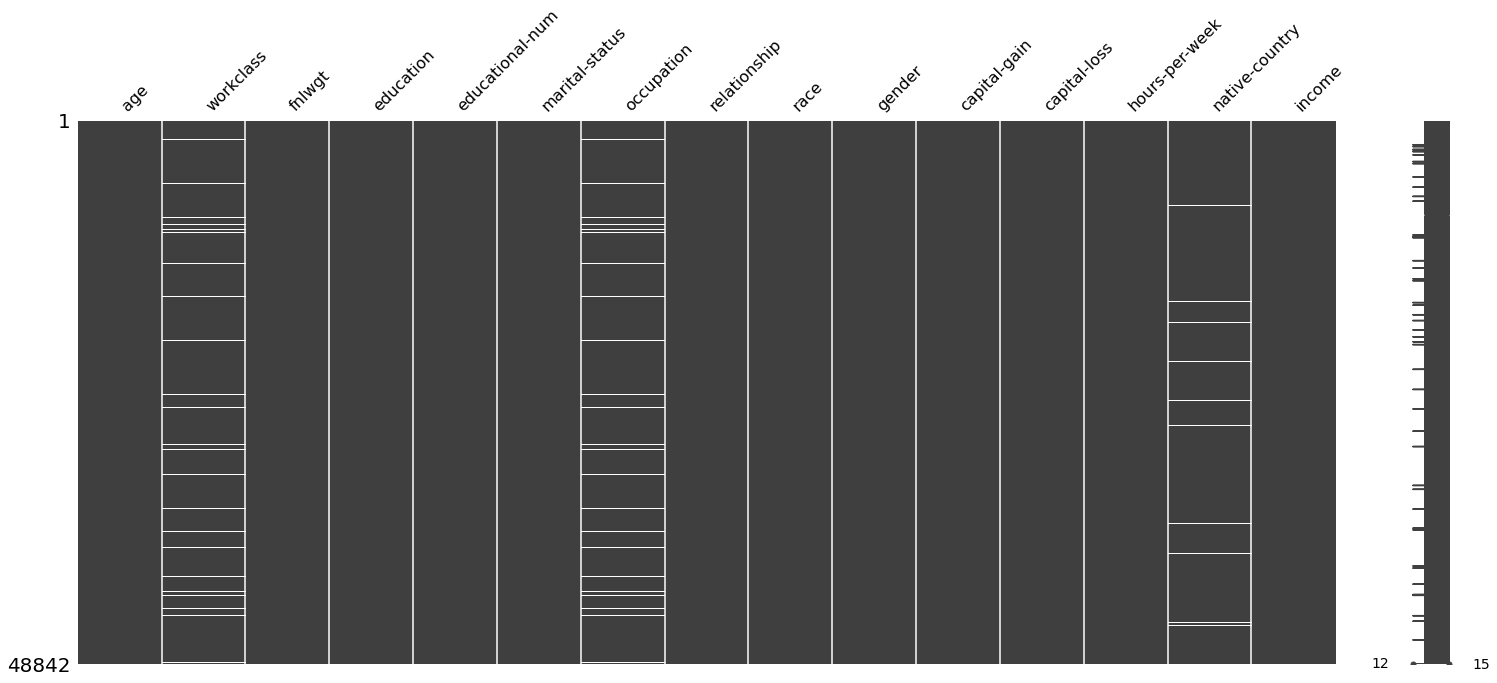

In [0]:
import missingno as msno
msno.matrix(df)

In [0]:
new_df=df.dropna(how='any')
new_df

age     workclass  fnlwgt  ... hours-per-week  native-country income
0       25       Private  226802  ...             40   United-States  <=50K
1       38       Private   89814  ...             50   United-States  <=50K
2       28     Local-gov  336951  ...             40   United-States   >50K
3       44       Private  160323  ...             40   United-States   >50K
5       34       Private  198693  ...             30   United-States  <=50K
...    ...           ...     ...  ...            ...             ...    ...
48837   27       Private  257302  ...             38   United-States  <=50K
48838   40       Private  154374  ...             40   United-States   >50K
48839   58       Private  151910  ...             40   United-States  <=50K
48840   22       Private  201490  ...             20   United-States  <=50K
48841   52  Self-emp-inc  287927  ...             40   United-States   >50K

[45222 rows x 15 columns]

In [0]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              45222 non-null  int64 
 1   workclass        45222 non-null  object
 2   fnlwgt           45222 non-null  int64 
 3   education        45222 non-null  object
 4   educational-num  45222 non-null  int64 
 5   marital-status   45222 non-null  object
 6   occupation       45222 non-null  object
 7   relationship     45222 non-null  object
 8   race             45222 non-null  object
 9   gender           45222 non-null  object
 10  capital-gain     45222 non-null  int64 
 11  capital-loss     45222 non-null  int64 
 12  hours-per-week   45222 non-null  int64 
 13  native-country   45222 non-null  object
 14  income           45222 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.5+ MB


In [0]:
new_df.drop(columns='fnlwgt',index=2)

age         workclass  ... native-country  income
0       25           Private  ...  United-States   <=50K
1       38           Private  ...  United-States   <=50K
3       44           Private  ...  United-States    >50K
5       34           Private  ...  United-States   <=50K
7       63  Self-emp-not-inc  ...  United-States    >50K
...    ...               ...  ...            ...     ...
48837   27           Private  ...  United-States   <=50K
48838   40           Private  ...  United-States    >50K
48839   58           Private  ...  United-States   <=50K
48840   22           Private  ...  United-States   <=50K
48841   52      Self-emp-inc  ...  United-States    >50K

[45221 rows x 14 columns]

In [0]:
df.isnull().sum()/len(df)*100

age                0.000000
workclass          5.730724
fnlwgt             0.000000
education          0.000000
educational-num    0.000000
marital-status     0.000000
occupation         5.751198
relationship       0.000000
race               0.000000
gender             0.000000
capital-gain       0.000000
capital-loss       0.000000
hours-per-week     0.000000
native-country     1.754637
income             0.000000
dtype: float64

**Step - 4 - Univariate Analysis -> PDF, Histograms, Boxplots, Countplots, etc..**


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
miss=['?']
df=pd.read_csv('Adult.csv')
na_values=miss
print(df.shape)
df.head()

(48842, 15)


age  workclass  fnlwgt  ... hours-per-week  native-country income
0   25    Private  226802  ...             40   United-States  <=50K
1   38    Private   89814  ...             50   United-States  <=50K
2   28  Local-gov  336951  ...             40   United-States   >50K
3   44    Private  160323  ...             40   United-States   >50K
4   18          ?  103497  ...             30   United-States  <=50K

[5 rows x 15 columns]

**PDF plot**

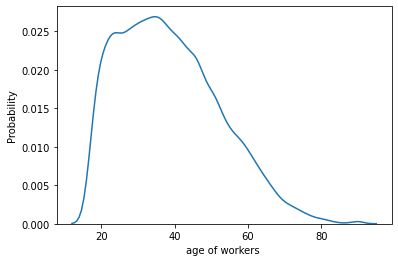

In [5]:
sns.distplot(df['age'],df['capital-gain'],hist=False,kde=True)
plt.xlabel("age of workers ")
plt.ylabel("Probability")
plt.show()


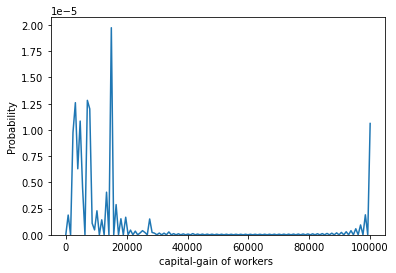

In [0]:
sns.distplot(df['capital-gain'],hist=False,kde=True)
plt.xlabel("capital-gain of workers ")
plt.ylabel("Probability")
plt.show()

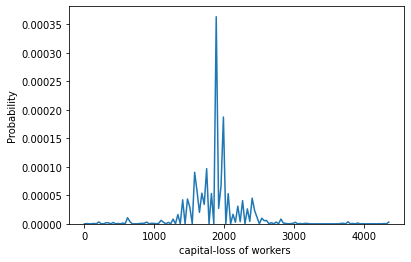

In [0]:
sns.distplot(df['capital-loss'],hist=False,kde=True)
plt.xlabel("capital-loss of workers ")
plt.ylabel("Probability")
plt.show()

**Observations** 

*  from first PDF plot we can say that as the age increases the probability of doing work is increases and age after 50 the probability of doing work is decreases.
*   from second and third PDF plot we can say that as the the capital gain and capital loss is, can be identified by those plot. 



**histogram**

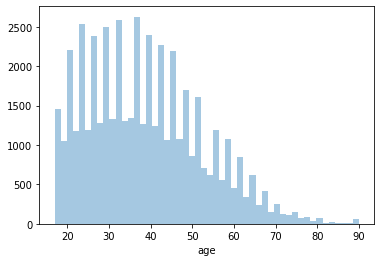

In [47]:
sns.distplot(df['age'],hist=True,kde=False,rug=False)

(array([ 4685.,     0., 41762.,     0.,     0.,  1519.,     0.,   406.,
            0.,   470.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

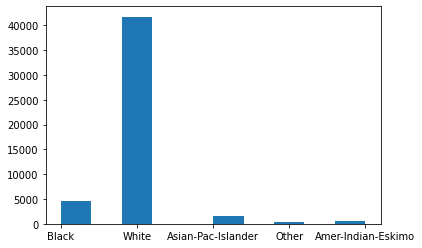

In [11]:
plt.hist(df['race'])

(array([16117., 22379.,     0.,  1518.,     0.,  6633.,  1530.,     0.,
          628.,    37.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <a list of 10 Patch objects>)

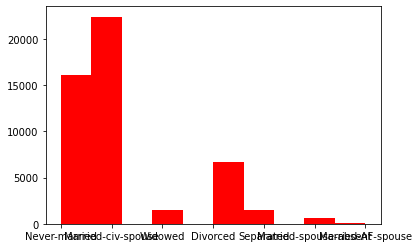

In [16]:
plt.hist(df['marital-status'],color='r')

**observation**


*   from histogram plot ,we conclude that from the age 22 to 42 ,the count of number of people is high .

*   we observe the number of race 
*  we can observe the number of  marital-status.







**box plot**

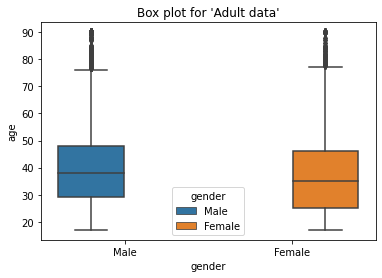

In [0]:
sns.boxplot(x='gender',y='age', data=df,hue='gender')
plt.title("Box plot for 'Adult data'")

plt.show()

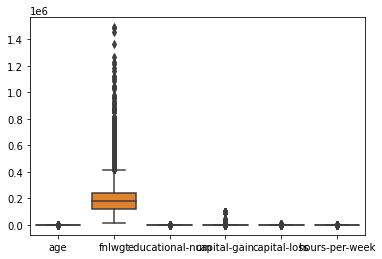

In [0]:
sns.boxplot(data=df)

In [33]:
px.box(df,x='gender',y='age')

**observation**


*   box plot ,we can conclude that median for male is in between 35 to 40 and foe female median is in between 30 to 38.
*   box plot from plotly , it will give all the value  approx , median for male is 38 and median for female is 35.



**countplot**

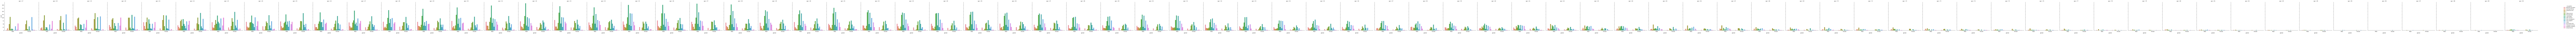

In [0]:
sns.catplot(x="gender", hue="occupation", col="age",data=df,  kind="count")

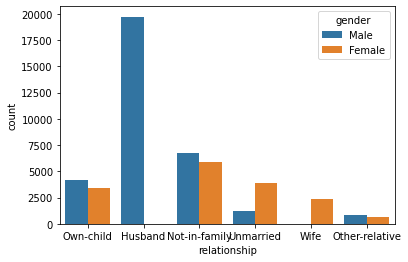

In [49]:
sns.countplot(x="relationship", hue="gender",data=df)

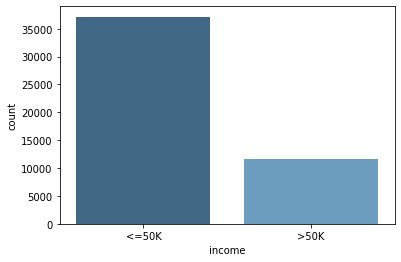

In [28]:
sns.countplot(x='income',data=df,palette='Blues_d')

**observation**

*  countplot ,in first countplot it shows occupation with the age and count them with people and related.
*   in second countplot it shows income with occupation and count people(gender) .



**Step - 5 - Bivariate Analysis**

**pair plot**

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2071: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning:

Data must have variance to compute a kernel density estimate.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning:

Data must have variance to compute a kernel density estimate.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning:

Data must have variance to compute a kernel density estimate.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning:

Data must have variance to compute a kernel density estimate.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning:

Data must have variance to compute a kernel density estimate.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning:

Data must have variance to comp

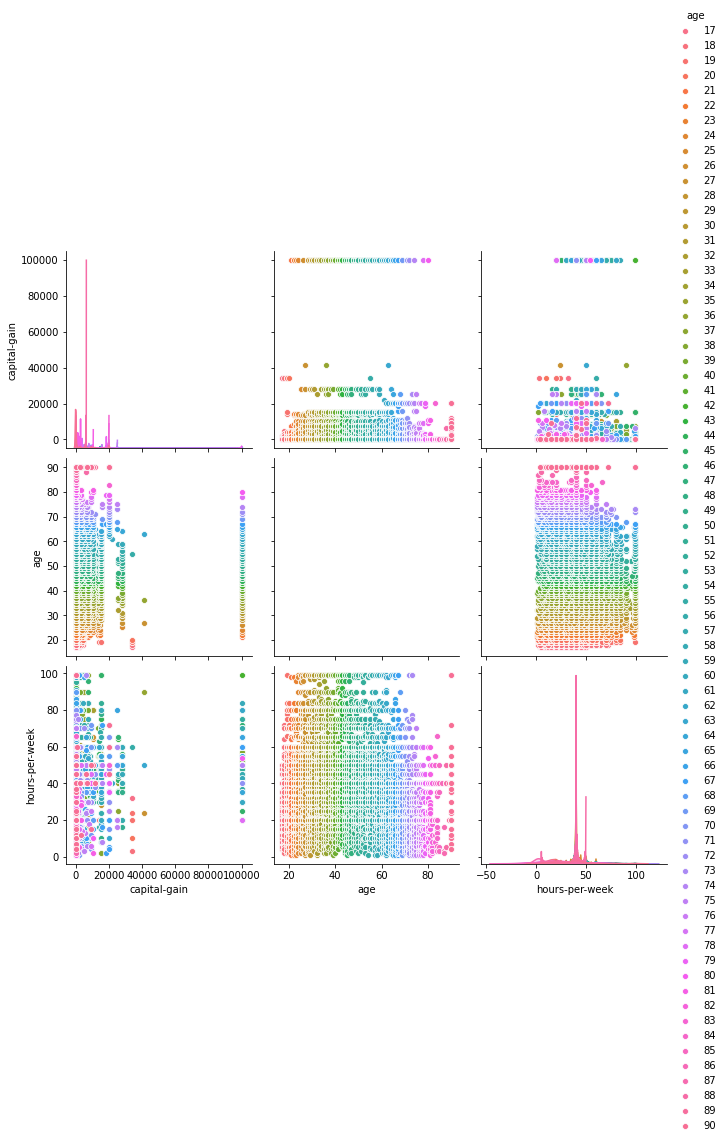

In [21]:
sns.pairplot(df, hue="age", size=3,vars=['capital-gain','age','hours-per-week']);


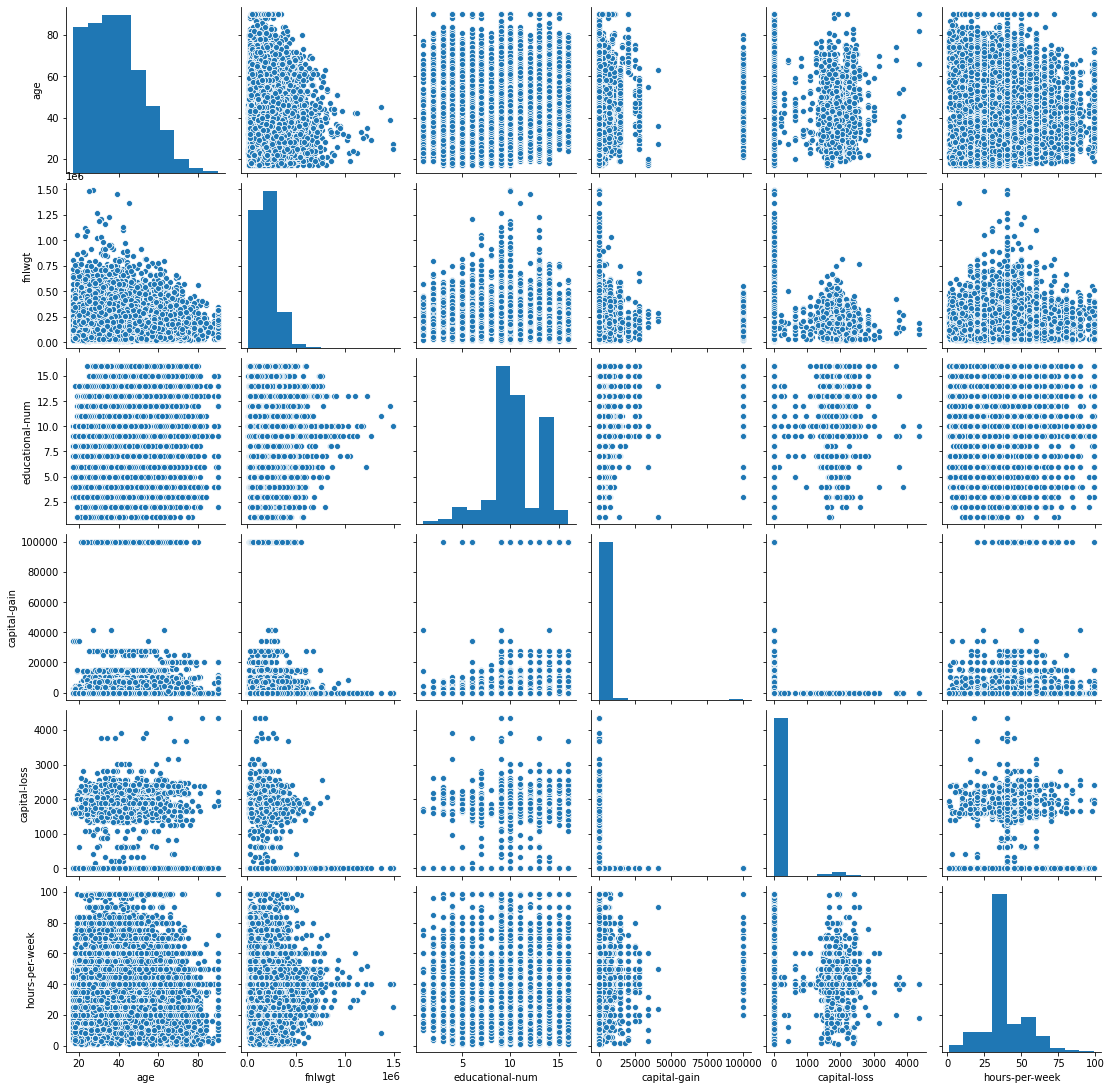

In [0]:
sns.pairplot(df)

**observation**   

*   from pair plot we can observe corelation between the numerical columns.




**hexbin plot**

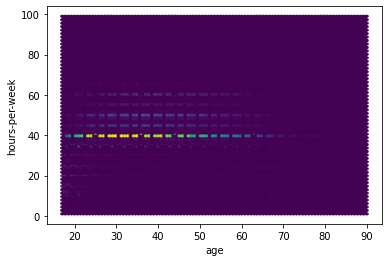

In [67]:
plt.hexbin(x='age',y='hours-per-week',data=df)
plt.xlabel('age')
plt.ylabel('hours-per-week')
plt.show()

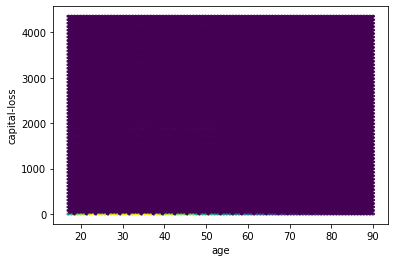

In [68]:
plt.hexbin(y='capital-loss',x='age',data=df)
plt.xlabel('age')
plt.ylabel('capital-loss')
plt.show()

**observation**


* hexbin plot shows the working hours for different groups of age.
*  we can also observe the capital - loss with increasing age.





**scatter plot**

In [44]:
px.scatter(df,x="age", y='occupation',color='gender')

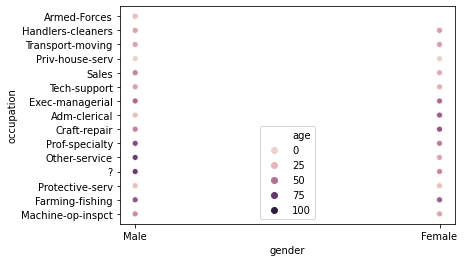

In [45]:
sns.scatterplot(x='gender',y='occupation',hue='age',data=df)

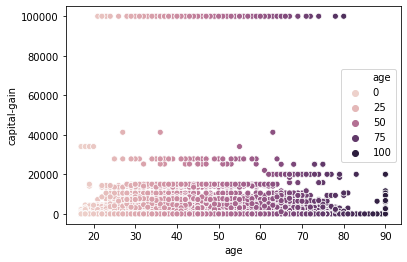

In [5]:
sns.scatterplot(x='age',y='capital-gain',hue='age',data=df)

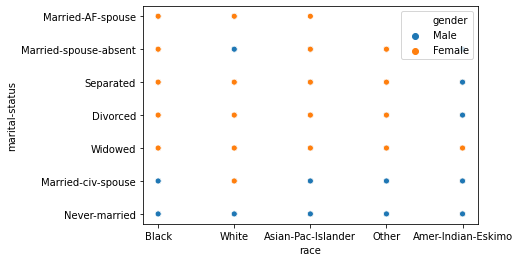

In [4]:
sns.scatterplot(x='race',y='marital-status',hue='gender',data=df)

**observation**


*   from scatter plot we can observe the relation between numeric columns .

*   we also can see the relation of categorical columns with others columns.
  



**swarm plot**

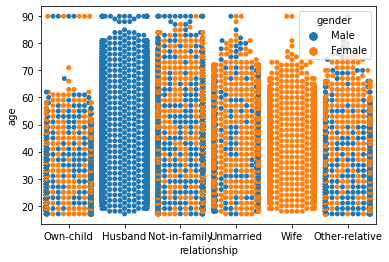

In [43]:
sns.swarmplot(data=df,x='relationship',y='age',hue='gender')

**observation**


*   with the swarm plot we can observe that the age of mostly males is 80+.




**bar plot**

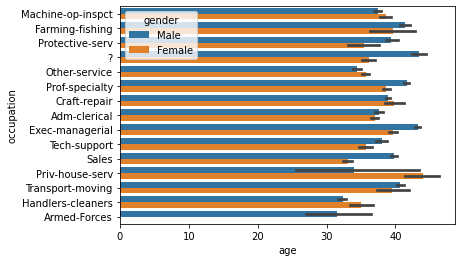

In [11]:
sns.barplot(x='age',y='occupation',data=df,hue='gender')

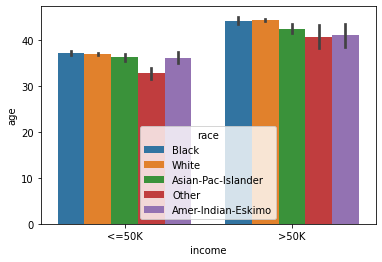

In [50]:
sns.barplot(x='income',y='age',data=df,hue='race')

In [12]:
px.bar(y='workclass',x='age',color='native-country',data_frame=df)

In [52]:
px.bar(y='relationship',x='educational-num',color='workclass',data_frame=df)

**observation**


*   we can conclude that it will give the information about columns.



**box plot**

In [33]:
px.box(df,x='relationship',y='age',color='race')

In [37]:
px.box(df,x='occupation',y='workclass',color='education')

**observation**


*   from these plot we can conclude that every categorical and numrical columns has relation.


**Step - 6 - Conclusion**


*  this Adult data is about age,race,workclass,gender,education,educational-num,income etc.
*  From these data we have concluded the missing values /data ,removed from that data.
*   & analysis is done by Univariate Analysis and with the bivariate analysis .
*   we have concluded the relatioship between the categorical columns and numerical columns with the help of plots.
*  all the data is analysed whether this belongs to the income or belongs to age , race,education,occupation etc.
*  these all plots gives the clear picture about the data and count them with the help of plot .








**Step - 7 -  feature transformation**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f91d244e588>]],
      dtype=object)

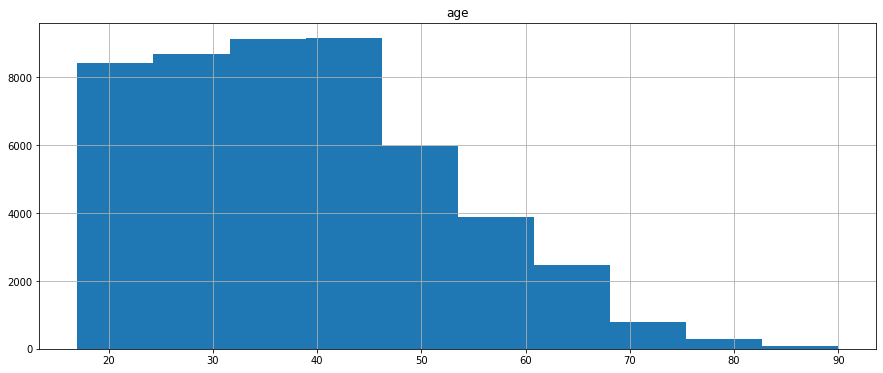

In [59]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df.hist(figsize=(10,5), column=['age'])